In [1]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
inter = pd.read_csv("reliable_data.csv")

**Ho:The loss percentage distribution for a given key follows a normal distribution.**

In [16]:
# Shapiro test for normality

grouped_data = inter.groupby('main_key')['loss_percentage'].apply(list)

normality_test_results = {}

for key, data in grouped_data.items():
    statistic, p_value = stats.shapiro(data)
    normality_test_results[key] = {'Statistic': statistic, 'P-Value': p_value}

for key, result in normality_test_results.items():
    print(f"Key: {key}, Shapiro-Wilk Statistic: {result['Statistic']}, P-Value: {result['P-Value']}")

alpha = 0.05
non_normal_keys = [key for key, result in normality_test_results.items() if result['P-Value'] < alpha]
normal_keys = [key for key, result in normality_test_results.items() if result['P-Value'] > alpha]


print('**************Total Normal keys are',len(normal_keys))
print('**************Total non-normal keys are',len(non_normal_keys))


if non_normal_keys:
    print(f"The following keys have non-normal distributions: {', '.join(non_normal_keys)}")
else:
    print("All keys have normal distributions.")


Key: azerbaijan_eggs, dried_whole supply chain, Shapiro-Wilk Statistic: 0.7092552185058594, P-Value: 0.007726724725216627
Key: azerbaijan_grapes_whole supply chain, Shapiro-Wilk Statistic: 0.49609440565109253, P-Value: 2.0729225070681423e-05
Key: azerbaijan_meat of goat, fresh or chilled_whole supply chain, Shapiro-Wilk Statistic: 0.7046531438827515, P-Value: 0.006917939987033606
Key: azerbaijan_oats_whole supply chain, Shapiro-Wilk Statistic: 0.5412836074829102, P-Value: 8.403594983974472e-05
Key: azerbaijan_onions and shallots, green_whole supply chain, Shapiro-Wilk Statistic: 0.7552054524421692, P-Value: 0.02238907851278782
Key: azerbaijan_potatoes_whole supply chain, Shapiro-Wilk Statistic: 0.4638161063194275, P-Value: 5.713973678211914e-06
Key: azerbaijan_tomatoes_whole supply chain, Shapiro-Wilk Statistic: 0.6398937106132507, P-Value: 0.0013507520779967308
Key: azerbaijan_wheat_whole supply chain, Shapiro-Wilk Statistic: 0.7554329633712769, P-Value: 0.022503217682242393
Key: beni

**Ho=The median loss percentage in the "storage" stage is not significantly different from the medians in other food supply stages.**

Kruskal-Wallis Statistic: 15.983702619490183
P-Value: 0.0030411104441874196
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1         group2       meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
      farm            harvest  -2.5678 0.8802 -10.0229  4.8873  False
      farm         processing  -2.5074 0.9937 -18.9859 13.9711  False
      farm            storage   0.0471    1.0   -6.149  6.2432  False
      farm whole supply chain   2.9213  0.534  -2.2546  8.0971  False
   harvest         processing   0.0605    1.0 -16.6572 16.7781  False
   harvest            storage   2.6149 0.8312  -4.1918  9.4216  False
   harvest whole supply chain   5.4891 0.0816  -0.4041 11.3823  False
processing            storage   2.5545 0.9928  -13.641 18.7499  False
processing whole supply chain   5.4286 0.8819 -10.4046 21.2619  False
   storage whole supply chain   2.8742 0.3305  -1.3142  7.0625  False
--------------

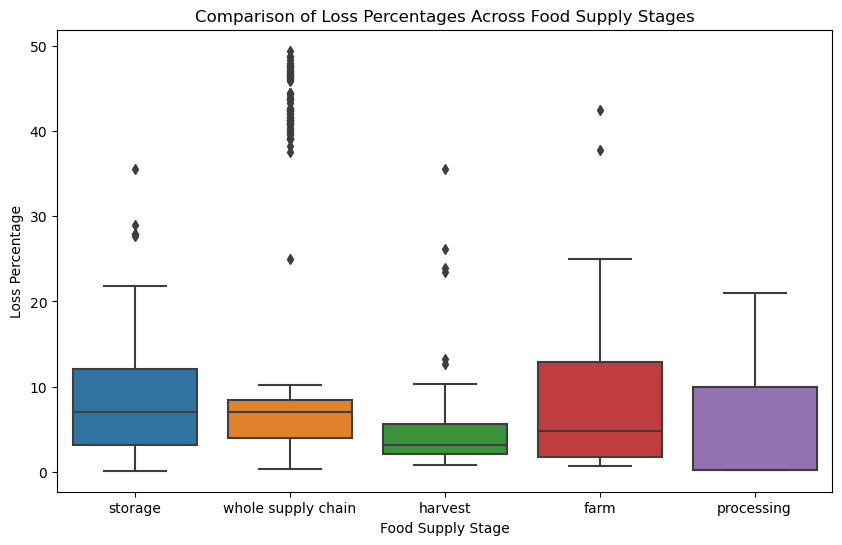

null hypothesis: Median loss percentage in storage is not significantly different from other stages.


In [17]:
hypothesis_data = inter.groupby('food_supply_stage')['loss_percentage'].apply(list)

statistic, p_value = stats.kruskal(*hypothesis_data)

print(f'Kruskal-Wallis Statistic: {statistic}')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    posthoc_dunn = pairwise_tukeyhsd(inter['loss_percentage'], inter['food_supply_stage'], alpha=0.05)
    print(posthoc_dunn)

    p_value_storage = posthoc_dunn.pvalues[1]  
    
    print(f'P-Value for Storage vs. Others: {p_value_storage}')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='food_supply_stage', y='loss_percentage', data=inter)
    plt.title('Comparison of Loss Percentages Across Food Supply Stages')
    plt.xlabel('Food Supply Stage')
    plt.ylabel('Loss Percentage')
    plt.show()

    alpha = 0.05
    if p_value_storage < alpha:
        print('Reject the null hypothesis: Median loss percentage in storage is significantly different from other stages.')
    else:
        print('null hypothesis: Median loss percentage in storage is not significantly different from other stages.')
else:
    print('Fail to reject the null hypothesis from the Kruskal-Wallis test: There is no significant difference in loss percentages acr')


**H0 - The variances of loss percentages are equal across all food supply stages.**

**Levene test to evluate our NULL hypothesis for non-normal keys** 

In [18]:
inter_non_normal = inter[inter['main_key'].isin(non_normal_keys)]

hypothesis_data = [inter_non_normal[inter_non_normal['food_supply_stage'] == stage]['loss_percentage'].dropna() for stage in inter_non_normal['food_supply_stage'].unique()]

statistic, p_value = stats.levene(*hypothesis_data)

print(f'Levene\'s Statistic: {statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: Variances of loss percentages among food supply stages are not equal.')
else:
    print('Fail to reject the null hypothesis: Variances of loss percentages among food supply stages are equal.')


Levene's Statistic: 0.9575966895994413
P-Value: 0.43048592264400853
Fail to reject the null hypothesis: Variances of loss percentages among food supply stages are equal.


**Bartlett test to evluate our NULL hypothesis for normal keys** 

In [19]:
inter_normal = inter[inter['main_key'].isin(normal_keys)]


hypothesis_data = [inter_normal[inter_normal['food_supply_stage'] == stage]['loss_percentage'].dropna() for stage in inter_normal['food_supply_stage'].unique()]

statistic, p_value = stats.bartlett(*hypothesis_data)

print(f'Bartlett\'s Statistic: {statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: Variances of loss percentages among food supply stages are not equal.')
else:
    print('Fail to reject the null hypothesis: Variances of loss percentages among food supply stages are equal.')


Bartlett's Statistic: 16.88509970901308
P-Value: 0.00021549995558845693
Reject the null hypothesis: Variances of loss percentages among food supply stages are not equal.
